In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
import joblib
import warnings
warnings.filterwarnings('ignore')


In [292]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import sqlite3
connection = sqlite3.connect('/content/gdrive/MyDrive/SQLLite/Task 4 - SQL Database.db')

In [ ]:
querry='SELECT * FROM loan_information inner join enterprise_information on loan_information.loan_id=enterprise_information.loan_id\
        inner join scores_information on loan_information.loan_id=scores_information.loan_id \
        left join disbursement_information on loan_information.account_number= disbursement_information.account_number '
df=pd.read_sql(querry,connection,index_col=None)
df

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,loan_id,business_type,business_activity,business_sector,enterprise_id,loan_id,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,account_number,total_disbursement_amount,disbursement_month
0,29321,None,71846,24500.0,2018-04-19,None,53,29321,None,Job Work,Machine Components,24500.0,29321,27.0,None,776.0,None,NaN,None
1,13613,TLWCU0003070,31083,10723.0,2017-08-10,TLWCU,39,13613,Trading,Retail,Electronics,10723.0,13613,30.0,Invoice & Banked,616.0,TLWCU0003070,400000.0,Aug-2017
2,13921,None,31928,11002.0,2017-08-17,None,56,13921,None,Retail,Agriculture,11002.0,13921,55.0,None,793.0,None,NaN,None
3,16520,None,38660,13220.0,2017-10-21,None,58,16520,None,Retail,Food & Beverage,13220.0,16520,26.0,None,781.0,None,NaN,None
4,49742,TLWCS0012623,119694,40426.0,2018-12-24,TLWCS,27,49742,Manufacturing,Job Work & Sales,Textiles,40426.0,49742,30.0,Cash & Non Banked,689.0,TLWCS0012623,500000.0,Jan-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2471,15639,None,36377,12454.0,2017-09-23,None,42,15639,None,Job Work & Sales,Wood,12454.0,15639,49.0,Cash & Non Banked,536.0,None,NaN,None
2472,14122,TLWCS0001490,32442,11166.0,2017-08-21,TLWCS,40,14122,Manufacturing,Job Work,Auto Components,11166.0,14122,43.0,Cash & Non Banked,760.0,TLWCS0001490,150000.0,Aug-2017
2473,3420,0007LTL1004271,10054,3489.0,None,TLWCS,15,3420,Manufacturing,Job Work,Auto Components,3489.0,3420,28.0,Invoice & Banked,802.0,0007LTL1004271,500000.0,Sep-2016
2474,42491,TLWCU0010873,102464,34711.0,2018-10-15,TLWCU,32,42491,Manufacturing,Sales,Fabrication,34711.0,42491,53.0,Invoice & Banked,773.0,TLWCU0010873,500000.0,Oct-2018


In [ ]:
df.shape

(2476, 19)

In [ ]:
df1=df.T.drop_duplicates().T
df1

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month
0,29321,None,71846,24500.0,2018-04-19,None,53,None,Job Work,Machine Components,27.0,None,776.0,NaN,None
1,13613,TLWCU0003070,31083,10723.0,2017-08-10,TLWCU,39,Trading,Retail,Electronics,30.0,Invoice & Banked,616.0,400000.0,Aug-2017
2,13921,None,31928,11002.0,2017-08-17,None,56,None,Retail,Agriculture,55.0,None,793.0,NaN,None
3,16520,None,38660,13220.0,2017-10-21,None,58,None,Retail,Food & Beverage,26.0,None,781.0,NaN,None
4,49742,TLWCS0012623,119694,40426.0,2018-12-24,TLWCS,27,Manufacturing,Job Work & Sales,Textiles,30.0,Cash & Non Banked,689.0,500000.0,Jan-2019
5,59718,None,12095,4346.0,2019-04-17,None,25,Trading,Retail,Houseware,29.0,Cash & Banked,757.0,NaN,None
6,65458,TLWCS0016745,150404,50738.0,2019-06-26,TLWCS,41,Manufacturing,Sales,Rubber,49.0,Invoice & Non Banked,793.0,400000.0,Jun-2019
7,20064,TLWCS0002705,49773,17187.0,2017-11-17,TLWCS,34,Manufacturing,Sales,Plastics,34.0,Invoice & Banked,718.0,500000.0,Dec-2017
8,37403,None,91252,30965.0,2018-08-21,None,98,Trading,Whole Sale,Fashion,42.0,Cash & Non Banked,539.0,NaN,None
9,11993,None,26816,9318.0,2017-06-22,TLAPS,87,None,Sales,Food Products,28.0,Cash & Non Banked,802.0,NaN,None


In [ ]:
df1.isnull().sum()

loan_id                             0
account_number                   1107
customer_id                         0
enterprise_id                       1
screening_date                    126
product_code                     1058
hub_id                              0
business_type                     463
business_activity                   1
business_sector                     1
ManagAgeui_APP                      3
BusinFormalityOfTheBusinessui     488
ManagCBscoreui_APP                  3
total_disbursement_amount        1107
disbursement_month               1107
dtype: int64

In [ ]:
df1.shape

(2476, 15)

In [ ]:
df1.head()

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month
0,29321,None,71846,24500.0,2018-04-19,None,53,None,Job Work,Machine Components,27.0,None,776.0,NaN,None
1,13613,TLWCU0003070,31083,10723.0,2017-08-10,TLWCU,39,Trading,Retail,Electronics,30.0,Invoice & Banked,616.0,400000.0,Aug-2017
2,13921,None,31928,11002.0,2017-08-17,None,56,None,Retail,Agriculture,55.0,None,793.0,NaN,None
3,16520,None,38660,13220.0,2017-10-21,None,58,None,Retail,Food & Beverage,26.0,None,781.0,NaN,None
4,49742,TLWCS0012623,119694,40426.0,2018-12-24,TLWCS,27,Manufacturing,Job Work & Sales,Textiles,30.0,Cash & Non Banked,689.0,500000.0,Jan-2019


In [ ]:
df1.describe()

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month
count,2476,1369,2476,2475.0,2350,1418,2476,2013,2475,2475,2473.0,1988,2473.0,1369.0,1369
unique,2476,1369,2443,2442.0,682,16,90,4,9,38,48.0,4,306.0,89.0,55
top,29321,TLWCU0003070,8357,1792.0,2019-02-12,TLWCS,37,Manufacturing,Retail,Fashion,34.0,Cash & Non Banked,0.0,200000.0,Mar-2018
freq,1,1,3,3.0,15,642,52,1131,744,316,133.0,1534,443.0,356.0,88


In [ ]:
df1.isnull().sum()

loan_id                             0
account_number                   1107
customer_id                         0
enterprise_id                       1
screening_date                    126
product_code                     1058
hub_id                              0
business_type                     463
business_activity                   1
business_sector                     1
ManagAgeui_APP                      3
BusinFormalityOfTheBusinessui     488
ManagCBscoreui_APP                  3
total_disbursement_amount        1107
disbursement_month               1107
dtype: int64

In [ ]:
df1.replace('', np.nan, inplace=True)

In [ ]:
df1['business_type'].fillna('Others',inplace=True)

In [ ]:
df1.business_type.value_counts()

Manufacturing    1131
Trading           873
Others            464
Services            8
Name: business_type, dtype: int64

In [ ]:
df.business_activity.value_counts()

Retail                           744
Sales                            549
Job Work & Sales                 482
Whole Sale                       364
Job Work                         322
Retail (Business to Customer)      5
Retail (Business to Business)      4
Job Work and sales                 4
Whole sale                         1
Name: business_activity, dtype: int64

In [ ]:
df1.business_activity.unique()

array(['Job Work', 'Retail', 'Job Work & Sales', 'Sales', 'Whole Sale',
       'Retail (Business to Business)', 'Retail (Business to Customer)',
       'Whole sale', 'Job Work and sales', None], dtype=object)

In [ ]:
df1['business_activity']=df1['business_activity'].fillna(df1['business_activity'].mode()[0])

In [ ]:
df1['business_sector']=df1['business_sector'].fillna(df1['business_sector'].mode()[0])

In [ ]:
df1['ManagAgeui_APP']=df1['ManagAgeui_APP'].fillna(df1['ManagAgeui_APP'].mode()[0])

In [ ]:
df1['enterprise_id']=df1['enterprise_id'].fillna(df1['enterprise_id'].mode()[0])

In [ ]:
df1.BusinFormalityOfTheBusinessui.unique()

array([None, 'Invoice & Banked', 'Cash & Non Banked', 'Cash & Banked',
       'Invoice & Non Banked'], dtype=object)

In [ ]:
df1.BusinFormalityOfTheBusinessui.value_counts()

Cash & Non Banked       1534
Invoice & Banked         231
Invoice & Non Banked     145
Cash & Banked             78
Name: BusinFormalityOfTheBusinessui, dtype: int64

In [ ]:
df1['BusinFormalityOfTheBusinessui']=df1['BusinFormalityOfTheBusinessui'].fillna('Others')

In [ ]:
#df1['ManagCBscoreui_APP']=df1['ManagCBscoreui_APP'].fillna(df1['ManagCBscoreui_APP'].mode()[0])

In [ ]:
df1.product_code.value_counts()

TLWCS    642
TLWCU    558
TLAPS    113
ICWCS     24
LCRDS     17
TLBDU     17
LCRDU     11
TLBDS      9
STWCU      6
TLMFS      5
VCWCS      4
ICAPS      4
STWCS      4
ICWCU      2
LCRIU      1
LCRIS      1
Name: product_code, dtype: int64

In [ ]:
df1['product_code'] = df1['product_code'].str[4:]

In [ ]:
df1.product_code.value_counts()

S    823
U    595
Name: product_code, dtype: int64

In [ ]:
df1['product_code']=df1['product_code'].fillna(df1['product_code'].mode()[0])

In [ ]:
df1.product_code.value_counts()

S    1881
U     595
Name: product_code, dtype: int64

In [ ]:
df1['ManagCBscoreui_APP'] = df1['ManagCBscoreui_APP'].fillna(-1)

In [ ]:
df1.isnull().sum()

loan_id                             0
account_number                   1107
customer_id                         0
enterprise_id                       0
screening_date                    126
product_code                        0
hub_id                              0
business_type                       0
business_activity                   0
business_sector                     0
ManagAgeui_APP                      0
BusinFormalityOfTheBusinessui       0
ManagCBscoreui_APP                  0
total_disbursement_amount        1107
disbursement_month               1107
dtype: int64

In [ ]:
df1.account_number.fillna(0,inplace=True)


In [ ]:
df1['account_number'][df1.account_number!=0]=1
df1.account_number.head()

0    0
1    1
2    0
3    0
4    1
Name: account_number, dtype: object

In [ ]:
df1.head()

,loan_id,account_number,customer_id,enterprise_id,screening_date,product_code,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount,disbursement_month
0,29321,0,71846,24500.0,2018-04-19,S,53,Others,Job Work,Machine Components,27.0,Others,776.0,NaN,None
1,13613,1,31083,10723.0,2017-08-10,U,39,Trading,Retail,Electronics,30.0,Invoice & Banked,616.0,400000.0,Aug-2017
2,13921,0,31928,11002.0,2017-08-17,S,56,Others,Retail,Agriculture,55.0,Others,793.0,NaN,None
3,16520,0,38660,13220.0,2017-10-21,S,58,Others,Retail,Food & Beverage,26.0,Others,781.0,NaN,None
4,49742,1,119694,40426.0,2018-12-24,S,27,Manufacturing,Job Work & Sales,Textiles,30.0,Cash & Non Banked,689.0,500000.0,Jan-2019


In [ ]:
df1.ManagCBscoreui_APP.unique()

array([776., 616., 793., 781., 689., 757., 718., 539., 802., 585., 699.,
       704.,   0., 725., 656., 544., 622., 766., 709., 783., 591., 764.,
       535., 794., 715., 745., 746., 813., 540., 762., 816., 817., 691.,
       663., 804., 556., 522., 525., 805., 660., 788., 774., 726., 824.,
       711., 797., 707., 545., 819., 790., 798., 796., 536., 700., 806.,
       664., 565., 770., 563., 731., 686., 624., 590., 812., 747., 605.,
       637., 514., 571., 533., 549., 752., 789., 777., 782., 541., 682.,
       630., 697., 737., 640., 710., 550., 773., 791., 785., 807., 814.,
       572., 730., 702., 759., 801., 780., 741., 598., 641., 735., 681.,
       596., 678., 823., 546., 673., 674., 739., 784., 638., 675., 615.,
       625., 609., 555., 538., 722., 727., 836., 724., 639., 524., 602.,
       795., 592., 693., 588., 534., 750., 775., 772., 676., 740., 755.,
       733., 708., 744., 742., 833., 531., 517., 537., 657., 696., 548.,
       569., 680., 799., 520., 521., 551., 620., 76

In [ ]:
df1.ManagCBscoreui_APP.unique()

array([776., 616., 793., 781., 689., 757., 718., 539., 802., 585., 699.,
       704.,   0., 725., 656., 544., 622., 766., 709., 783., 591., 764.,
       535., 794., 715., 745., 746., 813., 540., 762., 816., 817., 691.,
       663., 804., 556., 522., 525., 805., 660., 788., 774., 726., 824.,
       711., 797., 707., 545., 819., 790., 798., 796., 536., 700., 806.,
       664., 565., 770., 563., 731., 686., 624., 590., 812., 747., 605.,
       637., 514., 571., 533., 549., 752., 789., 777., 782., 541., 682.,
       630., 697., 737., 640., 710., 550., 773., 791., 785., 807., 814.,
       572., 730., 702., 759., 801., 780., 741., 598., 641., 735., 681.,
       596., 678., 823., 546., 673., 674., 739., 784., 638., 675., 615.,
       625., 609., 555., 538., 722., 727., 836., 724., 639., 524., 602.,
       795., 592., 693., 588., 534., 750., 775., 772., 676., 740., 755.,
       733., 708., 744., 742., 833., 531., 517., 537., 657., 696., 548.,
       569., 680., 799., 520., 521., 551., 620., 76

In [ ]:
df1['ManagCBscoreui_APP'][(df1.ManagCBscoreui_APP >=0) & (df1.ManagCBscoreui_APP <= 650)] =0

In [ ]:
df1['ManagCBscoreui_APP'][(df1.ManagCBscoreui_APP > 650)] = 1

In [ ]:
df1.ManagCBscoreui_APP.value_counts()

 1.0    1595
 0.0     878
-1.0       3
Name: ManagCBscoreui_APP, dtype: int64

In [ ]:
df1.isnull().sum()

loan_id                             0
account_number                      0
customer_id                         0
enterprise_id                       0
screening_date                    126
product_code                        0
hub_id                              0
business_type                       0
business_activity                   0
business_sector                     0
ManagAgeui_APP                      0
BusinFormalityOfTheBusinessui       0
ManagCBscoreui_APP                  0
total_disbursement_amount        1107
disbursement_month               1107
dtype: int64

In [ ]:
df1.rename(columns = {'product_code':'collateral'}, inplace = True)
df1.columns

Index(['loan_id', 'account_number', 'customer_id', 'enterprise_id',
       'screening_date', 'collateral', 'hub_id', 'business_type',
       'business_activity', 'business_sector', 'ManagAgeui_APP',
       'BusinFormalityOfTheBusinessui', 'ManagCBscoreui_APP',
       'total_disbursement_amount', 'disbursement_month'],
      dtype='object')

In [ ]:
df1['collateral'] = df1['collateral'].str.replace('S', 'Secured')

In [ ]:
df1['collateral'] = df1['collateral'].str.replace('U', 'Unsecured')

In [ ]:
df1.collateral.value_counts()

Secured      1881
Unsecured     595
Name: collateral, dtype: int64

In [ ]:
df1.rename(columns = {'account_number':'Target column'}, inplace = True)
df1.columns

Index(['loan_id', 'Target column', 'customer_id', 'enterprise_id',
       'screening_date', 'collateral', 'hub_id', 'business_type',
       'business_activity', 'business_sector', 'ManagAgeui_APP',
       'BusinFormalityOfTheBusinessui', 'ManagCBscoreui_APP',
       'total_disbursement_amount', 'disbursement_month'],
      dtype='object')

We have dropped disbursement_month and disbursemnt_amount as it gives us the similar infirmation whether the loan is sanctioned to the account holder.The amount int the disbursement_amount provides us the inforamtion only for the account numbers to whom the loan is already sanctioned.

We have dropped the screening date as it only provides us the information when the loan was sanctioned for an account number, it won't help in prediciting the loan sanctioning condition.


In [ ]:
#df1.drop('total_disbursement_amount',axis=1,inplace=True)

In [ ]:
df1['total_disbursement_amount'] = df1['total_disbursement_amount'].fillna(0)

In [ ]:
df1.drop('screening_date',axis=1,inplace=True)

In [ ]:
df1.drop('disbursement_month',axis=1,inplace=True)

In [ ]:
df1.columns

Index(['loan_id', 'Target column', 'customer_id', 'enterprise_id',
       'collateral', 'hub_id', 'business_type', 'business_activity',
       'business_sector', 'ManagAgeui_APP', 'BusinFormalityOfTheBusinessui',
       'ManagCBscoreui_APP', 'total_disbursement_amount'],
      dtype='object')

In [ ]:
df1.shape

(2476, 13)

In [ ]:
df1.head()

,loan_id,Target column,customer_id,enterprise_id,collateral,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount
0,29321,0,71846,24500.0,Secured,53,Others,Job Work,Machine Components,27.0,Others,1.0,0.0
1,13613,1,31083,10723.0,Unsecured,39,Trading,Retail,Electronics,30.0,Invoice & Banked,0.0,400000.0
2,13921,0,31928,11002.0,Secured,56,Others,Retail,Agriculture,55.0,Others,1.0,0.0
3,16520,0,38660,13220.0,Secured,58,Others,Retail,Food & Beverage,26.0,Others,1.0,0.0
4,49742,1,119694,40426.0,Secured,27,Manufacturing,Job Work & Sales,Textiles,30.0,Cash & Non Banked,1.0,500000.0


Exploratory Data Analysis

Univariate Analysis

In [ ]:
df1.columns

Index(['loan_id', 'Target column', 'customer_id', 'enterprise_id',
       'collateral', 'hub_id', 'business_type', 'business_activity',
       'business_sector', 'ManagAgeui_APP', 'BusinFormalityOfTheBusinessui',
       'ManagCBscoreui_APP', 'total_disbursement_amount'],
      dtype='object')

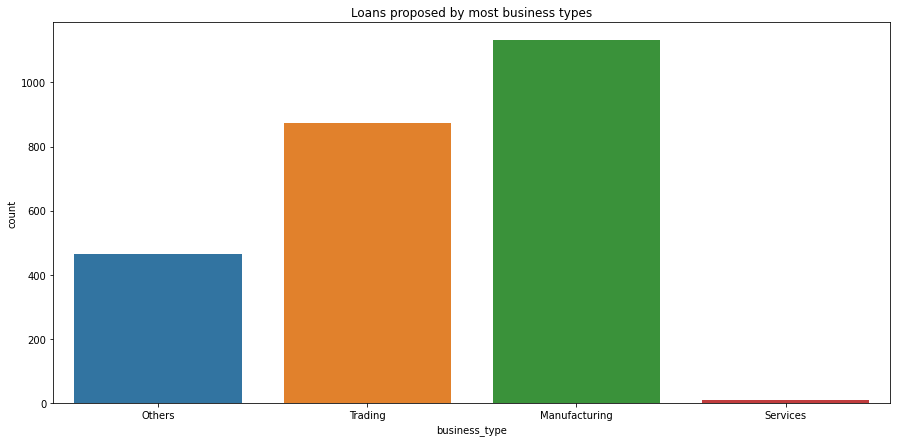

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(df1['business_type'])
plt.title('Loans proposed by most business types')
plt.show()

Box plots for quantitve columns

In [ ]:
ncols,nrows = (12,2)

In [ ]:
Col=['loan_id', 'Target column', 'customer_id', 'enterprise_id',
       'collateral', 'hub_id', 'business_type', 'business_activity',
       'business_sector', 'ManagAgeui_APP', 'BusinFormalityOfTheBusinessui',
       'ManagCBscoreui_APP', 'total_disbursement_amount']

Col
      

['loan_id',
 'Target column',
 'customer_id',
 'enterprise_id',
 'collateral',
 'hub_id',
 'business_type',
 'business_activity',
 'business_sector',
 'ManagAgeui_APP',
 'BusinFormalityOfTheBusinessui',
 'ManagCBscoreui_APP',
 'total_disbursement_amount']

We have only one quantitve column that is total disbursement amount

Text(0.5, 1.0, 'Box plot for Total loan amount disbursed')

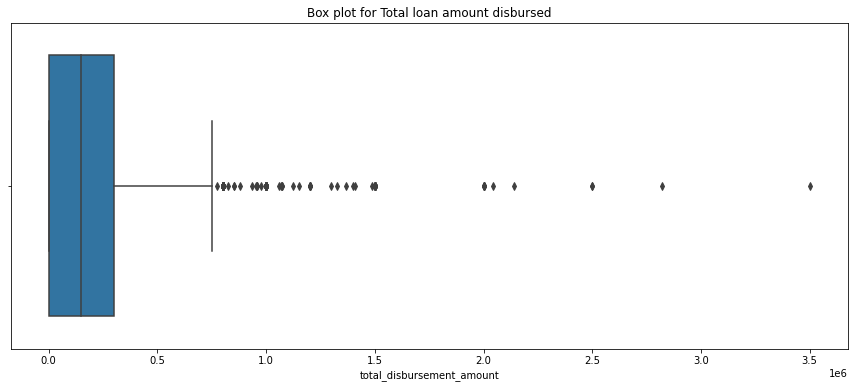

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(df1['total_disbursement_amount'])
plt.title('Box plot for Total loan amount disbursed')

It is clear from above box plot about outliers being present in the column.Most of the amount is in range of 0 to 0.25 (x10^6).

In [ ]:
Histogram ploting for qualitative columns

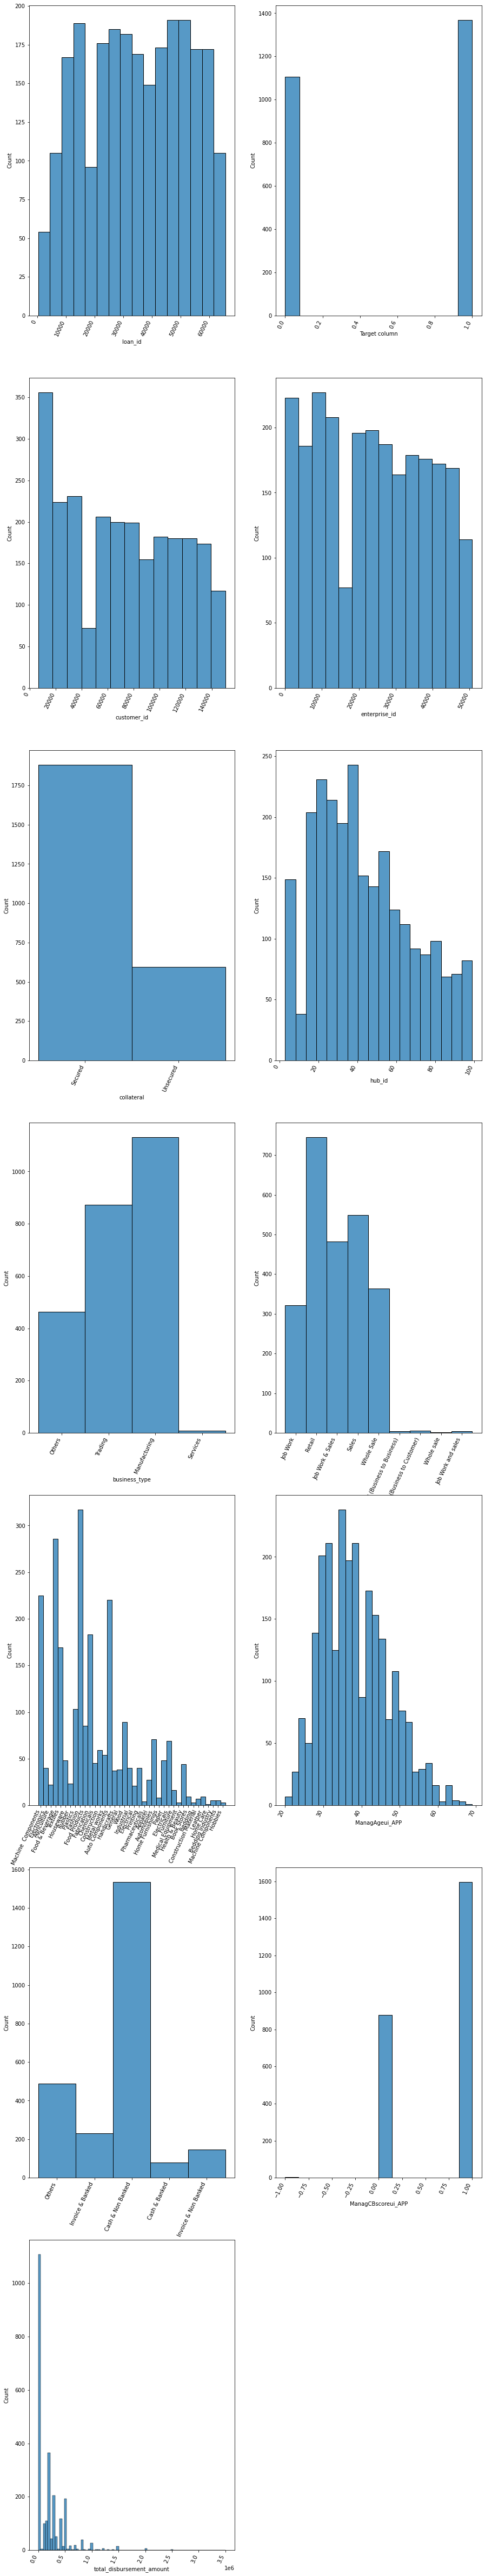

In [ ]:
plt.figure(figsize=(15,150))
for index,col in enumerate(Col):
    plt.subplot(ncols,nrows,index+1)
    sns.histplot(df1[Col[index]])
    plt.xticks(rotation=65, horizontalalignment='right')


Bivaraite Analysis

In [ ]:
df1.columns

Index(['loan_id', 'Target column', 'customer_id', 'enterprise_id',
       'collateral', 'hub_id', 'business_type', 'business_activity',
       'business_sector', 'ManagAgeui_APP', 'BusinFormalityOfTheBusinessui',
       'ManagCBscoreui_APP', 'total_disbursement_amount'],
      dtype='object')

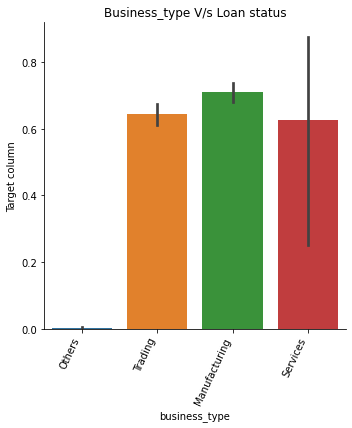

In [ ]:
sns.catplot(x='business_type',y='Target column',data=df1,kind='bar',size=5)
plt.xticks(rotation=65, horizontalalignment='right')
plt.title('Business_type V/s Loan status')
plt.show()

It is clear that loan is mostly sactioned and money was disbursed to the manfacturing business type.Service provding business and trading business were preferd after manufacturing.

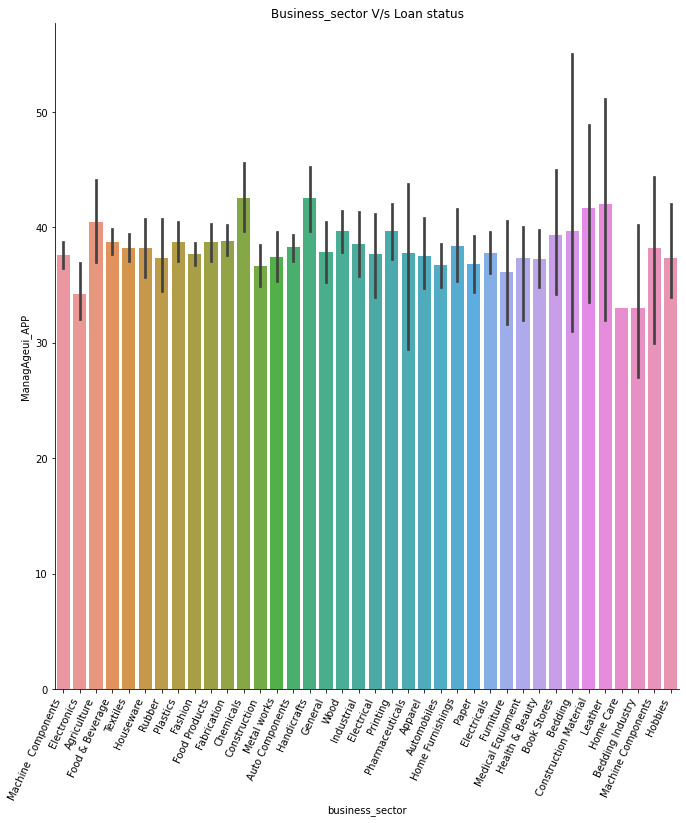

In [ ]:
sns.catplot(x='business_sector',y='ManagAgeui_APP',data=df1,kind='bar',size=10)
plt.xticks(rotation=65, horizontalalignment='right')
plt.title('Business_sector V/s Loan status')
plt.show()

It is clear from insight that people in 30-40 age group are the highest number applying for loan.

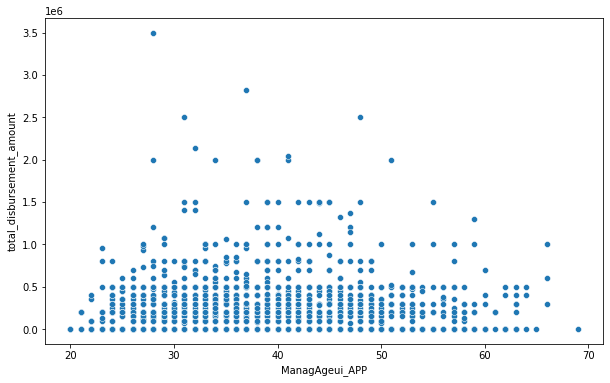

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(y='total_disbursement_amount',x='ManagAgeui_APP',data=df1)

Higher amount of loan is disbursed to the youger people.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

<Figure size 720x1440 with 0 Axes>

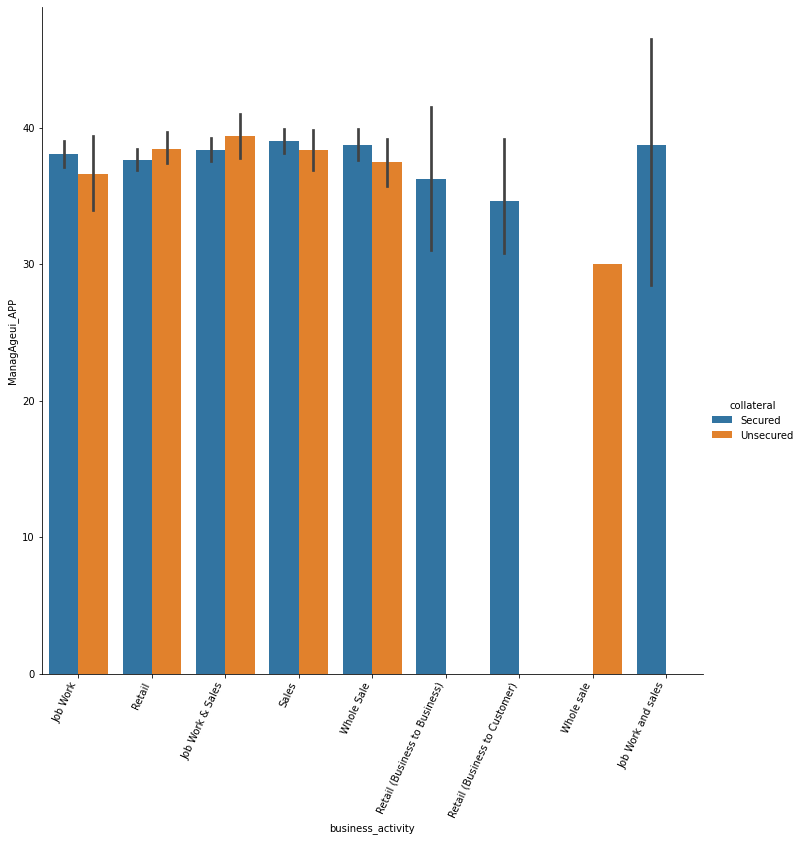

In [ ]:
plt.figure(figsize=(10,20))
sns.catplot(y='ManagAgeui_APP',x='business_activity',hue='collateral',data=df1,kind='bar',size=10)
plt.xticks(rotation=65, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text major ticklabel objects>)

<Figure size 1080x1152 with 0 Axes>

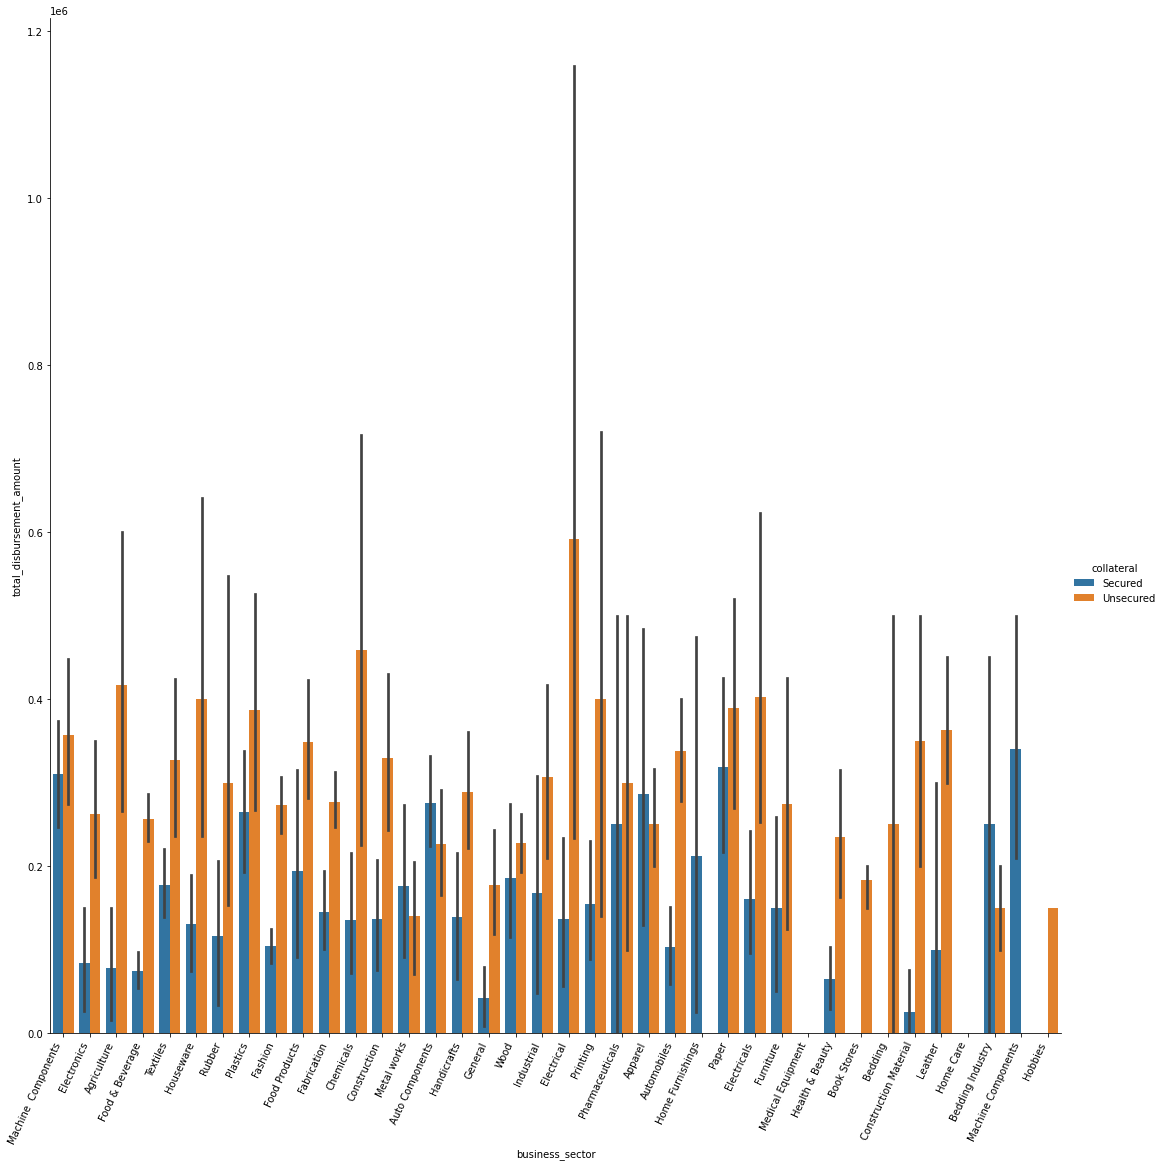

In [ ]:
plt.figure(figsize=(15,16))
sns.catplot(hue='collateral',y='total_disbursement_amount',x="business_sector",data=df1,kind='bar',size=15)
plt.xticks(rotation=65, horizontalalignment='right')

High amount of loan is dispursed to the unsecured people.

<Figure size 1080x1152 with 0 Axes>

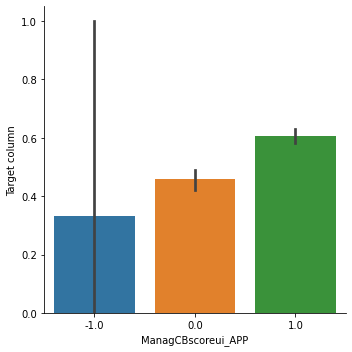

In [ ]:
plt.figure(figsize=(15,16))
sns.catplot(x='ManagCBscoreui_APP',y='Target column',data=df1,kind='bar')

Loan is disbursed to the accounts with higher cibil score(i.e 650+)

sns.scatterplot(y='ManagAgeui_APP',x='total_disbursement_amount',data=df1)
plt.show()

Total disbursment amount is not positively correalted to the age of the customer.

In [ ]:
df1.head()

,loan_id,Target column,customer_id,enterprise_id,collateral,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount
0,29321,0,71846,24500.0,Secured,53,Others,Job Work,Machine Components,27.0,Others,1.0,0.0
1,13613,1,31083,10723.0,Unsecured,39,Trading,Retail,Electronics,30.0,Invoice & Banked,0.0,400000.0
2,13921,0,31928,11002.0,Secured,56,Others,Retail,Agriculture,55.0,Others,1.0,0.0
3,16520,0,38660,13220.0,Secured,58,Others,Retail,Food & Beverage,26.0,Others,1.0,0.0
4,49742,1,119694,40426.0,Secured,27,Manufacturing,Job Work & Sales,Textiles,30.0,Cash & Non Banked,1.0,500000.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   loan_id                        2476 non-null   int64  
 1   Target column                  2476 non-null   object 
 2   customer_id                    2476 non-null   int64  
 3   enterprise_id                  2476 non-null   float64
 4   collateral                     2476 non-null   object 
 5   hub_id                         2476 non-null   int64  
 6   business_type                  2476 non-null   object 
 7   business_activity              2476 non-null   object 
 8   business_sector                2476 non-null   object 
 9   ManagAgeui_APP                 2476 non-null   float64
 10  BusinFormalityOfTheBusinessui  2476 non-null   object 
 11  ManagCBscoreui_APP             2476 non-null   float64
 12  total_disbursement_amount      2476 non-null   f

In [ ]:
df1['Target column'] = df1['Target column'].astype(int)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   loan_id                        2476 non-null   int64  
 1   Target column                  2476 non-null   int64  
 2   customer_id                    2476 non-null   int64  
 3   enterprise_id                  2476 non-null   float64
 4   collateral                     2476 non-null   object 
 5   hub_id                         2476 non-null   int64  
 6   business_type                  2476 non-null   object 
 7   business_activity              2476 non-null   object 
 8   business_sector                2476 non-null   object 
 9   ManagAgeui_APP                 2476 non-null   float64
 10  BusinFormalityOfTheBusinessui  2476 non-null   object 
 11  ManagCBscoreui_APP             2476 non-null   float64
 12  total_disbursement_amount      2476 non-null   f

In [ ]:
df1.corr()

,loan_id,Target column,customer_id,enterprise_id,hub_id,ManagAgeui_APP,ManagCBscoreui_APP,total_disbursement_amount
loan_id,1.000000,-0.164901,0.756466,0.753881,0.344787,0.013101,0.103178,-0.084393
Target column,-0.164901,1.000000,-0.216957,-0.219159,-0.121452,-0.037108,0.142969,0.626110
customer_id,0.756466,-0.216957,1.000000,0.999602,0.450092,-0.025791,0.013839,-0.192067
enterprise_id,0.753881,-0.219159,0.999602,1.000000,0.451484,-0.026534,0.015986,-0.194979
hub_id,0.344787,-0.121452,0.450092,0.451484,1.000000,0.008087,-0.012163,-0.126270
ManagAgeui_APP,0.013101,-0.037108,-0.025791,-0.026534,0.008087,1.000000,0.012161,-0.000133
ManagCBscoreui_APP,0.103178,0.142969,0.013839,0.015986,-0.012163,0.012161,1.000000,0.124127
total_disbursement_amount,-0.084393,0.626110,-0.192067,-0.194979,-0.126270,-0.000133,0.124127,1.000000


Check heat map for better undersatnding of correlation.

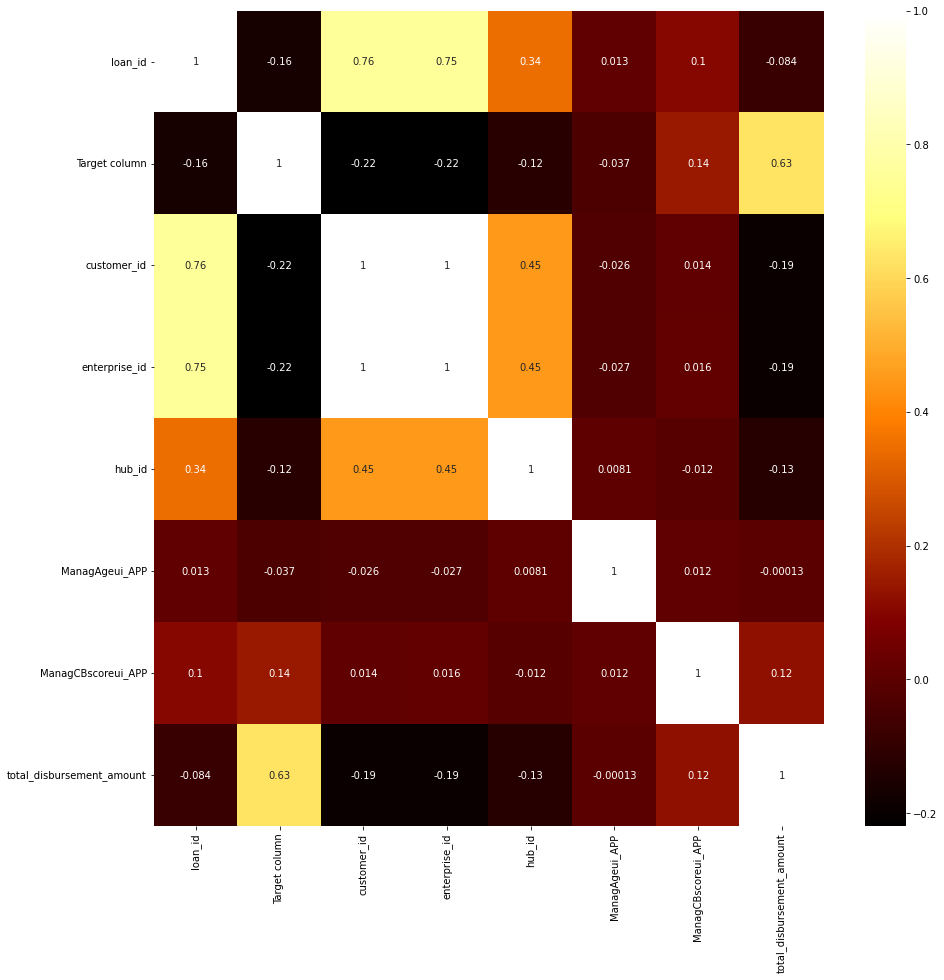

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,cmap='afmhot')

We can conclude customer_id  and enterprises_id are highly correlated.

In [ ]:
df1.drop('customer_id',inplace=True,axis=1)

In [ ]:
df1.drop('loan_id',inplace=True,axis=1) # As this is refrence column and won't provide any input in perfomance of the model

In [ ]:
df1.drop('enterprise_id',inplace=True,axis=1) # As this is refrence column and won't provide any input in perfomance of the model

In [ ]:
df1.drop('hub_id',inplace=True,axis=1) # As this is refrence column and won't provide any input in perfomance of the model

In [ ]:
df1.columns

Index(['loan_id', 'Target column', 'enterprise_id', 'collateral', 'hub_id',
       'business_type', 'business_activity', 'business_sector',
       'ManagAgeui_APP', 'BusinFormalityOfTheBusinessui', 'ManagCBscoreui_APP',
       'total_disbursement_amount'],
      dtype='object')

Checking for Outliers

In [ ]:
CN = df1[["total_disbursement_amount"]]
CN.describe()

,total_disbursement_amount
count,2.476000e+03
mean,2.047070e+05
std,2.940641e+05
min,0.000000e+00
25%,0.000000e+00
50%,1.500000e+05
75%,3.000000e+05
max,3.500000e+06


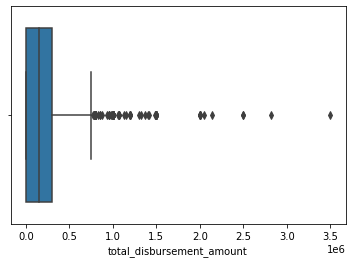

In [ ]:
sns.boxplot(df1["total_disbursement_amount"])

We will treat outliers by Quantile method

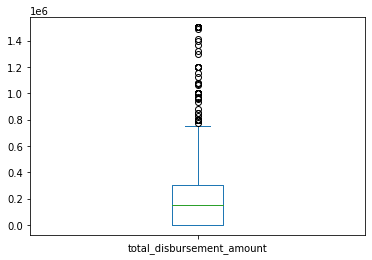

In [ ]:
for i in CN:
    
    q4=df1[i].quantile(0.99)
    df1[i][df1[i]>q4]=q4
    df1[i].plot.box()
    plt.show()

Encoding

In [ ]:
df1.head()

,loan_id,Target column,enterprise_id,collateral,hub_id,business_type,business_activity,business_sector,ManagAgeui_APP,BusinFormalityOfTheBusinessui,ManagCBscoreui_APP,total_disbursement_amount
0,29321,0,24500.0,Secured,53,Others,Job Work,Machine Components,27.0,Others,1.0,0.0
1,13613,1,10723.0,Unsecured,39,Trading,Retail,Electronics,30.0,Invoice & Banked,0.0,400000.0
2,13921,0,11002.0,Secured,56,Others,Retail,Agriculture,55.0,Others,1.0,0.0
3,16520,0,13220.0,Secured,58,Others,Retail,Food & Beverage,26.0,Others,1.0,0.0
4,49742,1,40426.0,Secured,27,Manufacturing,Job Work & Sales,Textiles,30.0,Cash & Non Banked,1.0,500000.0


In [ ]:
df1.columns

Index(['loan_id', 'Target column', 'enterprise_id', 'collateral', 'hub_id',
       'business_type', 'business_activity', 'business_sector',
       'ManagAgeui_APP', 'BusinFormalityOfTheBusinessui', 'ManagCBscoreui_APP',
       'total_disbursement_amount'],
      dtype='object')

In [ ]:
LOHC=['collateral',
       'business_type', 'business_activity', 'business_sector',
       'BusinFormalityOfTheBusinessui']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
OHC=OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
for i in LOHC:
    df1=pd.get_dummies(data=df1, columns=[i])

In [ ]:
df1.head()

,loan_id,Target column,enterprise_id,hub_id,ManagAgeui_APP,ManagCBscoreui_APP,total_disbursement_amount,collateral_Secured,collateral_Unsecured,business_type_Manufacturing,business_type_Others,business_type_Services,business_type_Trading,business_activity_Job Work,business_activity_Job Work & Sales,business_activity_Job Work and sales,business_activity_Retail,business_activity_Retail (Business to Business),business_activity_Retail (Business to Customer),business_activity_Sales,business_activity_Whole Sale,business_activity_Whole sale,business_sector_Agriculture,business_sector_Apparel,business_sector_Auto Components,business_sector_Automobiles,business_sector_Bedding,business_sector_Bedding Industry,business_sector_Book Stores,business_sector_Chemicals,business_sector_Construction,business_sector_Construction Material,business_sector_Electrical,business_sector_Electricals,business_sector_Electronics,business_sector_Fabrication,business_sector_Fashion,business_sector_Food & Beverage,business_sector_Food Products,business_sector_Furniture,business_sector_General,business_sector_Handicrafts,business_sector_Health & Beauty,business_sector_Hobbies,business_sector_Home Care,business_sector_Home Furnishings,business_sector_Houseware,business_sector_Industrial,business_sector_Leather,business_sector_Machine Components,business_sector_Machine Components,business_sector_Medical Equipment,business_sector_Metal works,business_sector_Paper,business_sector_Pharmaceuticals,business_sector_Plastics,business_sector_Printing,business_sector_Rubber,business_sector_Textiles,business_sector_Wood,BusinFormalityOfTheBusinessui_Cash & Banked,BusinFormalityOfTheBusinessui_Cash & Non Banked,BusinFormalityOfTheBusinessui_Invoice & Banked,BusinFormalityOfTheBusinessui_Invoice & Non Banked,BusinFormalityOfTheBusinessui_Others
0,29321,0,24500.0,53,27.0,1.0,0.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,13613,1,10723.0,39,30.0,0.0,400000.0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,13921,0,11002.0,56,55.0,1.0,0.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,16520,0,13220.0,58,26.0,1.0,0.0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,49742,1,40426.0,27,30.0,1.0,500000.0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
df1.shape

(2476, 65)

Data Spliting

In [ ]:
x=df1.drop('Target column',axis=1)
y=df1.iloc[:,1:2]

In [ ]:
y

,Target column
0,0
1,1
2,0
3,0
4,1
...,...
2471,0
2472,1
2473,1
2474,1


Correcting Imabalncing

In [ ]:
import imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [ ]:
y_over.value_counts()

Target column
0                1369
1                1369
dtype: int64

In [ ]:
x_over.shape

(2738, 64)

In [ ]:
y_over.shape

(2738, 1)

Skewness

In [ ]:
x_over.skew()

loan_id                                              -0.093450
enterprise_id                                         0.032117
hub_id                                                0.415681
ManagAgeui_APP                                        0.500745
ManagCBscoreui_APP                                   -0.607970
                                                        ...   
BusinFormalityOfTheBusinessui_Cash & Banked           5.671607
BusinFormalityOfTheBusinessui_Cash & Non Banked      -0.347152
BusinFormalityOfTheBusinessui_Invoice & Banked        2.992452
BusinFormalityOfTheBusinessui_Invoice & Non Banked    3.962295
BusinFormalityOfTheBusinessui_Others                  1.569894
Length: 64, dtype: float64

In [ ]:
pd.set_option('display.max_rows', None) # to see all the rows

In [ ]:
x_over.skew()

loan_id                                               -0.093450
enterprise_id                                          0.032117
hub_id                                                 0.415681
ManagAgeui_APP                                         0.500745
ManagCBscoreui_APP                                    -0.607970
total_disbursement_amount                              2.267768
collateral_Secured                                    -1.335627
collateral_Unsecured                                   1.371638
business_type_Manufacturing                            0.307609
business_type_Others                                   1.578927
business_type_Services                                18.428918
business_type_Trading                                  0.743855
business_activity_Job Work                             2.359110
business_activity_Job Work & Sales                     1.650241
business_activity_Job Work and sales                  26.119895
business_activity_Retail                

We will correct the skewness of total_disbursement_amount  column

We will have to correct the skewness only of vehicle_claim,all other columns skewness is within limit of -0.5 to 0.5.

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson',standardize=True) 
X_power=pt.fit_transform(x_over.iloc[:,5:6])
x_over.iloc[:,5:6]=pd.DataFrame(X_power,columns=x_over.iloc[:,5:6].columns)
x_over.iloc[:,5:6].skew()

total_disbursement_amount    0.013779
dtype: float64

Skewness of all the  columns is within the limit of -0.5 to 0.5

Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
x_over=pd.DataFrame(scaler.fit_transform(x_over),columns=x_over.columns)

In [ ]:
x_over.head()

,loan_id,enterprise_id,hub_id,ManagAgeui_APP,ManagCBscoreui_APP,total_disbursement_amount,collateral_Secured,collateral_Unsecured,business_type_Manufacturing,business_type_Others,business_type_Services,business_type_Trading,business_activity_Job Work,business_activity_Job Work & Sales,business_activity_Job Work and sales,business_activity_Retail,business_activity_Retail (Business to Business),business_activity_Retail (Business to Customer),business_activity_Sales,business_activity_Whole Sale,business_activity_Whole sale,business_sector_Agriculture,business_sector_Apparel,business_sector_Auto Components,business_sector_Automobiles,business_sector_Bedding,business_sector_Bedding Industry,business_sector_Book Stores,business_sector_Chemicals,business_sector_Construction,business_sector_Construction Material,business_sector_Electrical,business_sector_Electricals,business_sector_Electronics,business_sector_Fabrication,business_sector_Fashion,business_sector_Food & Beverage,business_sector_Food Products,business_sector_Furniture,business_sector_General,business_sector_Handicrafts,business_sector_Health & Beauty,business_sector_Hobbies,business_sector_Home Care,business_sector_Home Furnishings,business_sector_Houseware,business_sector_Industrial,business_sector_Leather,business_sector_Machine Components,business_sector_Machine Components,business_sector_Medical Equipment,business_sector_Metal works,business_sector_Paper,business_sector_Pharmaceuticals,business_sector_Plastics,business_sector_Printing,business_sector_Rubber,business_sector_Textiles,business_sector_Wood,BusinFormalityOfTheBusinessui_Cash & Banked,BusinFormalityOfTheBusinessui_Cash & Non Banked,BusinFormalityOfTheBusinessui_Invoice & Banked,BusinFormalityOfTheBusinessui_Invoice & Non Banked,BusinFormalityOfTheBusinessui_Others
0,0.444576,0.482328,0.520833,0.142857,1.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.203910,0.210747,0.375000,0.204082,0.5,0.909023,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.208629,0.216247,0.552083,0.714286,1.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.248449,0.259970,0.572917,0.122449,1.0,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.757450,0.796270,0.250000,0.204082,1.0,0.924410,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Model Execution

Logistic Regression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=.30,random_state=42)

In [ ]:
    LG=LogisticRegression()
    LG.fit(x_train,y_train)
    LG.score(x_train,y_train)
    pred=LG.predict(x_test)
    print('The model is:',LG)
    print('Accuracy score:',accuracy_score(y_test,pred)*100)
    print('\n')
    print('confusion matrix \n',confusion_matrix(y_test,pred))
    print('\n')
    print('classification report\n',classification_report(y_test,pred))
    print('\n')
    print('cross validation score')
    score=cross_val_score(LG,x_over,y_over,cv=5)
    print("cross val score",score)
    print('cross val score mean:',score.mean()*100)
    print('\n')
    print('Difference between accuracy score and cross val mean score :',(accuracy_score(y_test,pred)-(score.mean())))
    print('\n')

The model is: LogisticRegression()
Accuracy score: 100.0


confusion matrix 
 [[405   0]
 [  0 417]]


classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       417

    accuracy                           1.00       822
   macro avg       1.00      1.00      1.00       822
weighted avg       1.00      1.00      1.00       822



cross validation score
cross val score [1. 1. 1. 1. 1.]
cross val score mean: 100.0


Difference between accuracy score and cross val mean score : 0.0


